# Workflow for Hypothesis Leanring Domain Writing

### 06/2023
### Yongtao Liu

#### 

### Install and Import

In [10]:
import os
import win32com.client
import numpy as np
import time
import h5py
import sidpy
import pyNSID
import matplotlib.pyplot as plt
from tqdm import tqdm

# import acquition.py
from Acquisition_v0_5 import Acquisition   # include the Acquistion_v0.py in the same directory


import cv2
# import imutils
from os.path import exists
# from jupyterthemes import jtplot
# jtplot.style()

### Start BEPyAE.exe and set VI

* Start BEPyAE.ext
* Set VI of BEPyAE; if this version includes PyScanner, also set VIs for PyScanner

In [11]:
newexp = Acquisition(exe_path = r"G:\My Drive\AE\PyAE\BEPyAE 060123 01\BEPyAE.exe")   # exe_path is the directory of BEPyAE; 

### Initialize Igor AR18
* Set offline development
* Build a connection between BEPyAE and AR18
* Get parameters in AR18

In [12]:
newexp.init_BEPyAE(offline_development = True) # set offline_development=True if doing offline development
                                                # executing this will also initlize AR18

>##### Hereinafter 
> * If no parameters are provided in a function, executing the function will utilize the default parameters within $BEPyAE.exe$.
> * Certain functions provide feedback after execution, which can be disabled by setting $feedbackon=False$. This allows you to deactivate feedback during specific iterations or instances when it is not required.
> * Note: For tip locations, -1 corresponds to the left-hand side on the x-axis and the bottom side on the y-axis, while 1 corresponds to the right-hand side on the x-axis and the top side on the y-axis.

### Set tip parameters
* set setpoint, tip locations

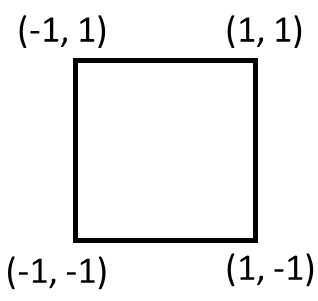

In [13]:
newexp.tip_control(tip_parms_dict = {"set_point_V_00": 1, "next_x_pos_00": -0.5, "next_y_pos_01": 0.5},
                   do_move_tip = True, 
                   do_set_setpoint = True) # Executing this code will set setpoint to 1 V, 
                                           # and move tip to location [0.5, 0.5]

Setpoint is:  1.0
Tip parameters are:  (-0.5, 0.5, 1.0)
Please reset if some parameters are incorrect


### Set IO 
This defines IO parameters, such as AFM platform: AR18, amplifiers, channel data types, etc

In [14]:
newexp.define_io_cluster(IO_cluster_parms_dict = {"analog_output_amplifier_06": 1, 
                                                  "channel_01_type_07": 1, 
                                                  "channel_02_type_08": 2,"channel_03_type_09": 3,})

IO control parameters are:  ('0 Cypher AR18', '6124', 4000000.0, 10.0, 10.0, 'AC and DC on AO0', 1.0, 'none', 'none', 'none', 'external')
Please reset if some parameters are incorrect


### Set BE pulse parameters 

In [15]:
# set BE parameters
newexp.define_be_parms(be_parms_dict = {"center_frequency_Hz_00": 335, "band_width_Hz_01": 100,
                                       "amplitude_V_02": 1, "phase_variation_03": 1,
                                       "repeats_04": 4, "req_pulse_duration_s_05": 4,
                                       "auto_smooth_ring_06": 1}, 
                      do_create_be_waveform = True)

BE parameters are:  (335000.0, 100000.0, 1.0, 1.0, 4, 0.004, 1, 3352.2952763920002, 0.12159459061880915)
Please reset if some parameters are incorrect


(335000.0,
 100000.0,
 1.0,
 1.0,
 4,
 0.004,
 1,
 3352.2952763920002,
 0.12159459061880915)

# *Run a Few Tests Before Experiment*
# --------------------------------------------------------

### BE Line scan
* This is a single BE line scan
* This returns 5 datasets: quick_fitting, complex spectra, and 3 channels

In [16]:
# Do a single line scan
qk_fit, com_spec, chn1, chn2, chn3 = newexp.do_line_scan(line_scan_parms_dict = {"num_BE_pulses_01": 32,
                                                                                 "start_x_pos_00": -0.5, "start_y_pos_01": 0,
                                                                                 "stop_x_pos_02": 0.5, "stop_y_pos_03": 0},
                                                         upload_to_daq = True, do_line_scan = True)

voltage offset and number of BE pulse are:  (0.0, 32)
line scan start and end positions:  (-0.5, 0.0, 0.5, 0.0)


### BE Raster Scan
* Square raster scan
* raster_scan returns 3 sidpy datasets: BEPFM quick fitting, channels, and BE complex spectra
* raster_scan also saves these 3 sidpy dataset in a hdf5 file

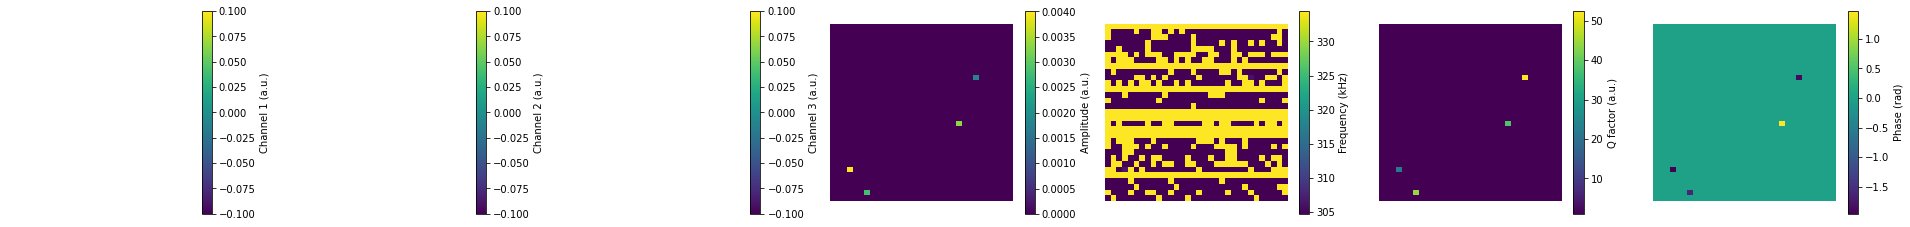

 [progress: 0:00:41] |************************************  | (ETA:   0:00:01) C:\Users\yla\Anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\yla\Anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\yla\Anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


In [17]:
# Do a 64*64 raster scan
dset_pfm, dset_chns, dset_cs = newexp.raster_scan(raster_parms_dict = {"scan_pixel": 32, "scan_x_start": -0.8,
                                                                       "scan_y_start": -0.8,"scan_x_stop": 0.8,
                                                                       "scan_y_stop": 0.8}, 
                                                  file_name = "pfm")

# if you see below error, check if you set IO channels manually---this has to be done manually now
 ### TypeError: When specifying values over which a parameter is varied, values should not be an empty array

### BE Raster Scan Results
* 1. BE quick fit

In [ ]:
dset_pfm

In [ ]:
# plot BEPFM quick fit data
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (25, 5), dpi = 100)
ax1.imshow(dset_pfm[:,:,0])
ax2.imshow(dset_pfm[:,:,1])
ax3.imshow(dset_pfm[:,:,2])
ax4.imshow(dset_pfm[:,:,3])
ax5.imshow(dset_pfm[:,:,4])

* 2. channels

In [ ]:
dset_chns

In [ ]:
# plot channel data
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), dpi = 100)
ax1.imshow(dset_chns[0,:,:])
ax2.imshow(dset_chns[1,:,:])
ax3.imshow(dset_chns[2,:,:])

* 3. complex spectra

In [ ]:
# complex spectra
dset_cs

In [ ]:
hf = h5py.File('pfm_0.hf5', 'r+')
sidpy.hdf.hdf_utils.print_tree(hf)

# *Tests Done*
# -------------------------------------------------------- 

# Experiment Starts

#### In this experiment, we begin by applying a DC pulse to switch the ferroelectric polarization. Subsequently, a BEPFM (Bias-Enhanced Piezoresponse Force Microscopy) measurement is conducted to image the domain structure.

1. To initiate the measurement process, we first need to determine the location for each individual measurement. There are two scenarios to consider:

> * For each measurement, a new location is chosen, requiring a location array to record all the measurements as demonstrated below.

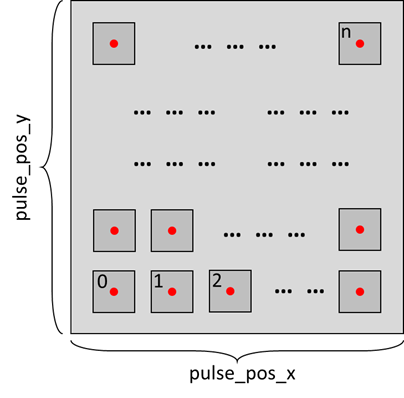

> * Alternatively, all measurements are conducted at the same location. In this case, the measurement location needs to be initialized each time a new measurement is started, as shown below.

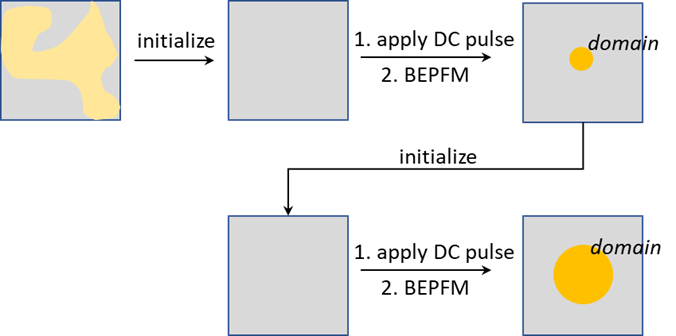

2. Prior to experiments, we also need to establish the DC pulse parameters including pulse magnitude $A$ and pulse length $t$ , as shown below. Again, there are two scenarios to consider here:

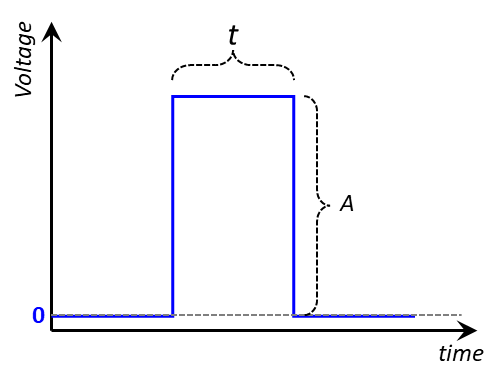

> * The pulse parameters can be pre-defined, e.g., the parameter values can be uniformly distributed within a specified range or customized to suit the experimental requirements.
> * The pulse parameters can be random values within a defined space, typically these random values is a uniform distribution across that space in principle.

## Experiment. Perform each measurement at a new location with pre-defined pulse parameters

### *@ Local PC*
### Prior to expeirment, set a directory to save data

In [21]:
os.chdir(r"C:\Users\yla\Dropbox (ORNL)\BEPyAE\Notebooks\Hypothesis_learning\Test")

In [22]:
def domain_size (img, thresh):
    thresh_img = np.copy(img)
    thresh_img [img > thresh] = 1
    thresh_img [img < thresh] = 0
    
    # find contours in the thresholded image
    thresh_img = thresh_img.astype(np.uint8)
    cnts = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    center = np.zeros((len(cnts), 2))
    radius = np.zeros(len(cnts))
    for num_domain in range (len(cnts)):
        (x,y),r = cv2.minEnclosingCircle(cnts[num_domain])
        #center location
        center[num_domain,0] = x
        center[num_domain,1] = y
        #radius of minimum circle
        radius[num_domain] = r
    
    #calculate the distance between domain center and image center (writing point)
    img_size = img.shape[0]
    img_center_x = int(img_size/2)
    img_center_y = int(img_size/2)
    #away_writing_point = np.sqrt((center[:,0]-img_center_x)**2 + (center[:,1]-img_center_y)**2)
    away_writing_point = np.sqrt((center[:,0]-32)**2 + (center[:,1]-32)**2)

    #then, calculate the total area of residue domains
    if len(radius) == 0:
        print ("domain size is 0.0")
        f, ax = plt.subplots()
        ax.imshow(thresh_img)
        plt.show()
        plt.close()
        return 0.0      #if no domains, return domain size as 0
    elif away_writing_point.min() > 20:   #if the nearest domain is away (13) from the center, treat it as noise or the domains originally in the region
        print ("domain size is 0.0")
        f, ax = plt.subplots()
        ax.imshow(thresh_img)
        plt.show()
        plt.close()
        return 0.0      #return domain size as 0
    else:
        #return_domain_size = np.sqrt((radius[away_writing_point.argmin()]**2))   # we use square root as area, treat the neareast domain as the written domain
        return_domain_size = (radius.max())
        
        f, ax = plt.subplots()
        ax.imshow(thresh_img, origin = "lower")
#         for c in range(len(radius)):
#             Drawing_colored_circle=plt.Circle(center[c], radius[c], fill = False, color = 'white', linewidth = 4);
#             ax.add_artist(Drawing_colored_circle)
        Drawing_colored_circle=plt.Circle(center[away_writing_point.argmin()], radius[away_writing_point.argmin()], 
                                          fill = False, color = 'white', linewidth = 4);
        ax.add_artist(Drawing_colored_circle)    
        plt.show()
        plt.close()
        return return_domain_size   

### *@ Local PC*
### Step 1. Generate a location array

In [23]:
# All locations span across [start_point_x, end_point_x] in x-direction and [start_point_y, end_point_y] in y-direction.
# There are num_x rows and num_y columns in the locations array

start_point_x = -0.9   # Define location array parameters
end_point_x = 0.9
start_point_y = -0.9
end_point_y = 0.9
num_x = 10
num_y = 10

# Generate location array
pos_x = np.linspace(-0.9, 0.9, num_x)
pos_y = np.linspace(-0.9, 0.9, num_y)
pulse_pos = np.meshgrid(pos_x, pos_y)
pulse_pos_x = pulse_pos[0].reshape(-1)
pulse_pos_y = pulse_pos[1].reshape(-1)  # pulse_pos_x and pulse_pos_y are the coordinates of all locations

# Set BEPFM image size
img_size = 0.1

# Check
if img_size > np.abs(pos_x[0]-pos_x[1]):
    print ("Alert: there will be image overlap along x-direction")
elif img_size > np.abs(pos_y[0]-pos_y[1]):
    print ("Alert: there will be image overlap along y-direction")
else:
    print("{} locations are ready for experiments".format(len(pulse_pos_x)))

100 locations are ready for experiments


# ---------------------------------------------------------------------------------------------------------------

>> # *@ GPU Server*
> ### Copy, Paste, and Execute @ GPU Server


### *@ GPU Server*
### Step 2. Install and import @ GPU server, and define help functions

In [7]:
Please run this code @ GPU server
-------------------------------------------------------------------

!pip install --upgrade jax==0.2.25
!pip install -q git+https://github.com/ziatdinovmax/gpax.git
!pip install numpy --upgrade


from typing import Dict

import gpax
import numpyro
import numpy as onp
import jax.numpy as jnp
import jax.random as jra
import matplotlib.pyplot as plt
import time
from mlsocket import MLSocket

print('jax device: ', jax.devices())

gpax.utils.enable_x64()

SyntaxError: invalid syntax (Temp/ipykernel_21664/3515848405.py, line 3)

In [ ]:
Please run this code @ GPU server
-------------------------------------------------------------------

def model_data(x: jnp.ndarray, params: Dict[str, float]) -> jnp.ndarray:
    """
    r = r_c + r_0 * ((V/V_c)^2 - 1)^{1/3}
    """
    return params["r_c"] + params["r_0"] * jnp.cbrt((x[:, 0] / params["V_c"])**2 - 1)

def grid2xy(X1, X2):
    """
    Maps (M, N) grid to (M*N, 2) xy coordinates.
    Removes NaNs (if any)
    """
    X = jnp.concatenate((X1[None], X2[None]), 0)
    d0, d1 = X.shape[0], X.shape[1] * X.shape[2]
    X = X.reshape(d0, d1).T
    X = X[~jnp.isnan(X).any(axis=1)]
    return X

#data initialization and update functions
def init_training_data_exp(X, Y, num_seed_points=2, rng_seed=42, list_of_indices=None):
    onp.random.seed(rng_seed)
    indices = jnp.arange(len(X))
    idx = list_of_indices
    if idx is not None:
        idx = onp.array(idx)
    else:
        idx = onp.random.randint(0, len(X), num_seed_points)
    #idx = onp.unique(idx)
    X_train, y_train = X[idx], Y
    indices_train = indices[idx]
    X_test = jnp.delete(X, idx, axis = 0)
    #y_test = jnp.delete(Y, idx)
    indices_test = jnp.delete(indices, idx)
    return X_train, y_train, X_test, indices_train, indices_test

def update_datapoints_exp(next_point_idx, train, test, y_new):
    """Update "measured" dummy data points"""
    X_train, y_train, indices_train = train
    X_test, indices_test = test
    X_train = jnp.append(X_train, X_test[next_point_idx][None], axis = 0)
    X_test = jnp.delete(X_test, next_point_idx, axis = 0)
    y_train = jnp.append(y_train, y_new[0])
    #y_test = jnp.delete(y_test, next_point_idx)
    indices_train = jnp.append(indices_train, next_point_idx)
    indices_test = jnp.delete(indices_test, next_point_idx)
    return (X_train, y_train, indices_train), (X_test, indices_test)

params = {"r_c": 1, "r_0": 1.5 , "V_c": 2}
#params = {"alpha": 1.1, "beta": .4}

d1 = 20
d2 = 20

V = jnp.linspace(1, 10, d1)
log_tau = jnp.linspace(-3, 2, d2)
V, log_tau = onp.meshgrid(V, log_tau)
X = grid2xy(V, log_tau)
y = model_data(X, params) + .4 * jra.normal(jra.PRNGKey(1), shape=(len(X),))
print ("Parameter space: ", X)

### *@ GPU Server*
### Step 3. Generate random seedings

In [ ]:
Please run this code @ GPU server
-------------------------------------------------------------------

# Generate seed write parameters

onp.random.seed(5)
seed_step = 20

# random index
idx = []
onp.random.seed(10)

idx = onp.random.choice(len(y), size = seed_step, replace=False)

print(len(set(idx)))
idx = onp.asarray(idx)
indx = jnp.asarray(idx).tolist()
print(len(idx))

X_measured = X[idx]
y_measured = y[idx]
X_unmeasured = jnp.delete(X, idx, axis=0)

onp.save("seed_write_paras.npy", X_measured)  # send this to local

>> # *Done @ GPU Server*
> # Back @ local PC
# ---------------------------------------------------------------------------------------------------------------


### *@ Local PC*

### Step 4. Transferseeding parameters from GPU server to local PC via sftp

### *@ Local PC*
### Step 5. Load seed writing parameters

In [ ]:
# load seed parameters from GPU-server
seed_paras_file = "/content/seed_write_paras.npy"
seed_write_paras = np.load(seed_paras_file)

# check seed parameters
print ("Seed Parameters: ", seed_write_paras)

### *@ Local PC*
### Step 6. Start seed measurements

In [ ]:
seed_domain_size = []
for i in tqdm(range(len(seed_write_paras))):
    #####################----------- Move tip to the pulse location -----------##################### 
    newexp.tip_control(tip_parms_dict = {"set_point_V_00": 1,
                                         "next_x_pos_00": pulse_pos_x[i],
                                         "next_y_pos_01": pulse_pos_y[i]},
                       do_move_tip = True, do_set_setpoint = True)
    time.sleep(0.2)
    
    #####################----------- Apply pulse -----------##################### 
    # load pulse
    V_amp = -seed_write_paras[0][i]
    V_time_log = seed_write_paras[1][i]
    V_time = math.pow(1o, V_time)
    print ("Write Parameters: {} V, {} s".format(V_amp, V_time))
    
    # apply pulse
    newexp.define_apply_pulse(pulse_parms_dict = {"pulse_init_amplitude_V_00": 0, "pulse_mid_amplitude_V_01": V_amp,
                                                  "pulse_final_amplitude_V_02": 0, "pulse_on_duration_s_03": V_time,
                                                  "rise_time_s_05": 1E-4, "pulse_final_duration_s_04": 20E-3,
                                                  "pulse_repeats_06": 1},
                              do_create_pulse = True, do_upload_pulse = True, do_apply_pulse = False)
    # 
    time.sleep(1)
    newexp.define_apply_pulse(pulse_parms_dict = {"pulse_init_amplitude_V_00": 0, "pulse_mid_amplitude_V_01": V_amp,
                                                  "pulse_final_amplitude_V_02": 0, "pulse_on_duration_s_03": V_time,
                                                  "rise_time_s_05": 1E-4, "pulse_final_duration_s_04": 20E-3,
                                                  "pulse_repeats_06": 1},
                              do_create_pulse = True, do_upload_pulse = True, do_apply_pulse = True)
    time.sleep(2)
    
    #####################----------- Do BEPFM to image domain -----------#####################
    dset_pfm, dset_chns, dset_cs = newexp.raster_scan(raster_parms_dict = {"scan_pixel": 64,
                                                                           "scan_x_start": pulse_pos_x[i]-(img_size/2), 
                                                                           "scan_y_start": pulse_pos_y[i]-(img_size/2),
                                                                           "scan_x_stop": pulse_pos_x[i]+(img_size/2), 
                                                                           "scan_y_stop": pulse_pos_y[i]+(img_size/2)},
                                                      file_name = "HypoAl_Domain_Writing_{}".format(i), 
                                                      progress_on = False, plot_on = False)
    time.sleep(0.5)
    
    # Plot BEPFM images
    f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (30, 5), dpi = 100)
    ax1.imshow(dset_pfm[:,:,0])
    ax2.imshow(dset_pfm[:,:,1])
    ax3.imshow(dset_pfm[:,:,2])
    ax4.imshow(dset_pfm[:,:,3])
    ax5.imshow(dset_chns[0,:,:])
    ax6.imshow(dset_chns[1,:,:])
    plt.show()
    
    # Calculate domain size
    pha = np.asarray(dset_pfm[:,:,3])
    ds = domain_size (pha, 0.3)
    seed_domain_size.append(ds)  # add domain size to list
    
# Save seed domain size
np.save("seed_domain_size.npy", np.asarray(seed_domain_size)) # send this to GPU server

# ---------------------------------------------------------------------------------------------------------------

>> # *@ GPU Server*
> ### Copy, Paste, and Execute @ GPU Server

### *@ GPU Server*
### Step 7. Send seeding results to GPU server via sftp

### *@ GPU Server*
### Step 8. Prepare seeding train data

In [ ]:
Please run this code @ GPU server
-------------------------------------------------------------------

y_measured = onp.load("seed_domain_size.npy")

(X_train, y_train, X_test, 
 indices_train, indices_test) = init_training_data_exp(X, y_measured, list_of_indices = indx)

onp.savez("dataset_seed.npz", X_measured=X_train, y_measured=y_train, 
          indices_measured=indices_train, X_unmeasured=X_test, indices_unmeasured=indices_test)
onp.savez("dataset.npz", X_measured=X_train, y_measured=y_train, 
          indices_measured=indices_train, X_unmeasured=X_test, indices_unmeasured=indices_test)

### *@ GPU Server*
### Step 9. Start Hypothesis Active Learning exploration

In [ ]:
Please run this code @ GPU server
-------------------------------------------------------------------

exploration_step = 100
HOST = ''
PORT = 3446

# Bind to local PC
with MLSocket() as s:
    s.bind((HOST, PORT))
    s.listen()
    conn, address = s.accept()
    print("Bind successfully")
    with conn:
        # Warm-up phase
        print('Warm-up starts')
        
        # HypoAl Starts
        for i in range(exploration_steps):
            %run sGP_AL_domains_v1b.py dataset.npz
            next_point_idx = onp.load("next_idx.npy")
            nextpoint = onp.asarray(indices_test[next_point_idx])
            print ("Next measurement location is: ", nextpoint)
            
            # Send next point to local PC
            time.sleep(0.01)
            conn.send(nextpoint)
            time.sleep(0.01)
            
            print ("Waiting for new experiment result")
            # Accept new experiment results
            written_domain_size = conn.recv(920)
            time.sleep(0.01)
            
            # Update measured and unmeasured dataset
            y_new = jnp.asarray([written_domain_size])
            ((X_train, y_train, indices_train), (X_test, indices_test)) = update_datapoints_exp(
                next_point_idx, (X_train, y_train, indices_train), (X_test, indices_test), y_new)
            
            # Save results
            onp.savez("dataset{}.npz".format(i), X_measured=X_train, y_measured=y_train,
                      indices_measured=indices_train, X_unmeasured=X_test, indices_unmeasured=indices_test)
            onp.savez("dataset.npz", X_measured=X_train, y_measured=y_train,
                      indices_measured=indices_train, X_unmeasured=X_test, indices_unmeasured=indices_test)
    
            data = onp.load('dataset.npz')
    
            print (data['X_measured'], '\n', data['y_measured'], '\n', data['indices_measured'])
            print (data['X_unmeasured'], '\n', data['indices_unmeasured'])
        
    # disconnet and shut down socket
    conn.close()
    s.shutdown(1)
    s.close()

>> # *Done @ GPU Server*
># Back @ local PC

# ---------------------------------------------------------------------------------------------------------------

### *@ Local PC*
### Step 10. Connect to GPU server and start hypothesis driven active learning measurements

In [ ]:
exploration_step = 100
exploration_domain_size = []

HOST = 'localhost'
PORT = 9000

In [ ]:
with MLSocket() as s:
    s.connect((HOST, PORT))
    for i in tqdm(range(exploration_step)):
        #####################----------- Move tip to the pulse location -----------##################### 
        measure_loc = len (seed_write_paras) + i
        newexp.tip_control(tip_parms_dict = {"set_point_V_00": 1,
                                             "next_x_pos_00": pulse_pos_x[measure_loc],
                                             "next_y_pos_01": pulse_pos_y[measure_loc]},
                           do_move_tip = True, do_set_setpoint = True)
        time.sleep(0.2)
    
        #####################----------- Apply pulse -----------##################### 
        # receive the first write parameters from Sockets
        write_paras = s.recv(920)
        V_amp = write_paras[0]
        V_time = math.pow(10, write_paras[1])
    
        # apply pulse
        newexp.define_apply_pulse(pulse_parms_dict = {"pulse_init_amplitude_V_00": 0, "pulse_mid_amplitude_V_01": V_amp,
                                                      "pulse_final_amplitude_V_02": 0, "pulse_on_duration_s_03": V_time,
                                                      "rise_time_s_05": 1E-4, "pulse_final_duration_s_04": 20E-3,
                                                      "pulse_repeats_06": 1},
                                  do_create_pulse = True, do_upload_pulse = True, do_apply_pulse = False)
        
        time.sleep(1)
        newexp.define_apply_pulse(pulse_parms_dict = {"pulse_init_amplitude_V_00": 0, "pulse_mid_amplitude_V_01": V_amp,
                                                      "pulse_final_amplitude_V_02": 0, "pulse_on_duration_s_03": V_time,
                                                      "rise_time_s_05": 1E-4, "pulse_final_duration_s_04": 20E-3,
                                                      "pulse_repeats_06": 1},
                                  do_create_pulse = True, do_upload_pulse = True, do_apply_pulse = True)
    
        time.sleep(1)
    
         #####################----------- Do BEPFM to image domain -----------#####################
        dset_pfm, dset_chns, dset_cs = newexp.raster_scan(raster_parms_dict = {"scan_pixel": 64,
                                                                               "scan_x_start": pulse_pos_x[measure_loc]-(img_size/2),
                                                                               "scan_y_start": pulse_pos_y[measure_loc]-(img_size/2),
                                                                               "scan_x_stop": pulse_pos_x[measure_loc]+(img_size/2),
                                                                               "scan_y_stop": pulse_pos_y[measure_loc]+(img_size/2)},
                                                          file_name = "Domain_Writing_{}".format(i), 
                                                          progress_on = False, plot_on = False)
        time.sleep(0.5)
    
        # Plot BEPFM images
        f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (30, 5), dpi = 100)
        ax1.imshow(dset_pfm[:,:,0])
        ax2.imshow(dset_pfm[:,:,1])
        ax3.imshow(dset_pfm[:,:,2])
        ax4.imshow(dset_pfm[:,:,3])
        ax5.imshow(dset_chns[0,:,:])
        ax6.imshow(dset_chns[1,:,:])
        plt.show()
    
    
        # Calculate domain size
        pha = np.asarray(dset_pfm[:,:,3])
        ds = domain_size (pha, 0.3)
    
        # send domain size to GPU server
        ds = np.asarray(ds)
        time.sleep(0.01)
        s.send(measured_point)
        time.sleep(0.01)
    
        exploration_domain_size.append(ds)  # add domain size to list
    
    # Save seed domain size
    np.save("exploration_domain_size.npy", np.asarray(exploration_domain_size))
    
    s.close()

### *@ Local PC*
### Step 11. Do a BEPFM at the whole experiment area

In [ ]:
dset_pfm, dset_chns, dset_cs = newexp.raster_scan(raster_parms_dict = {"scan_pixel": 256, "scan_x_start": -1.0,
                                                                       "scan_y_start": -1.0,"scan_x_stop": 1.0,
                                                                       "scan_y_stop": 1.0}, file_name = "pfm_whole")

f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (30, 5), dpi = 100)
ax1.imshow(dset_pfm[:,:,0])
ax2.imshow(dset_pfm[:,:,1])
ax3.imshow(dset_pfm[:,:,2])
ax4.imshow(dset_pfm[:,:,3])
ax5.imshow(dset_chns[0,:,:])
ax6.imshow(dset_chns[1,:,:])
plt.show()